In [3]:
pip install pandas matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\saumy\Downloads\archive\heart.csv")  
df.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
# Basic info
df.info()

# Check for missing values
df.isnull().sum()

# Summary stats
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Text(0.5, 1.0, 'Heart Disease Distribution (1 = Disease)')

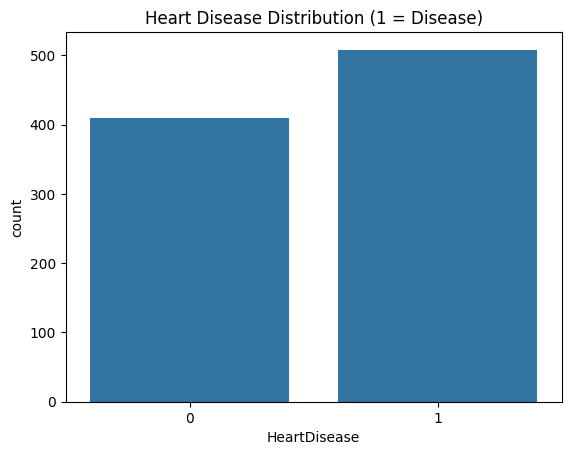

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="HeartDisease", data=df)
plt.title("Heart Disease Distribution (1 = Disease)")


Text(0.5, 1.0, 'Heart Disease by Chest Pain Type')

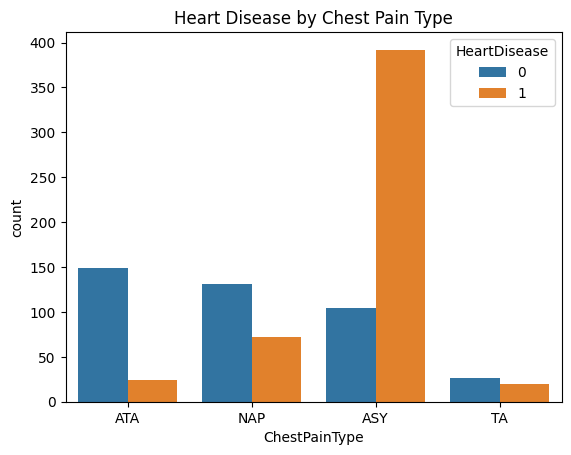

In [8]:
sns.countplot(x="ChestPainType", hue="HeartDisease", data=df)
plt.title("Heart Disease by Chest Pain Type")


<Axes: >

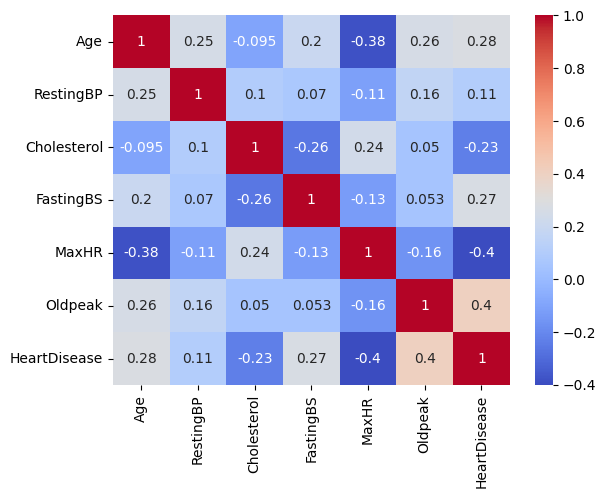

In [9]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [10]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        77
           1       0.88      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184

Accuracy: 0.8586956521739131


Model Summary:

Dataset: Heart Failure Prediction

Features used: 11 clinical features (e.g., chest pain, cholesterol, ECG, etc.)

Classifier: Random Forest

Accuracy: 86% on unseen data

Goal: Identify patients at risk for heart disease

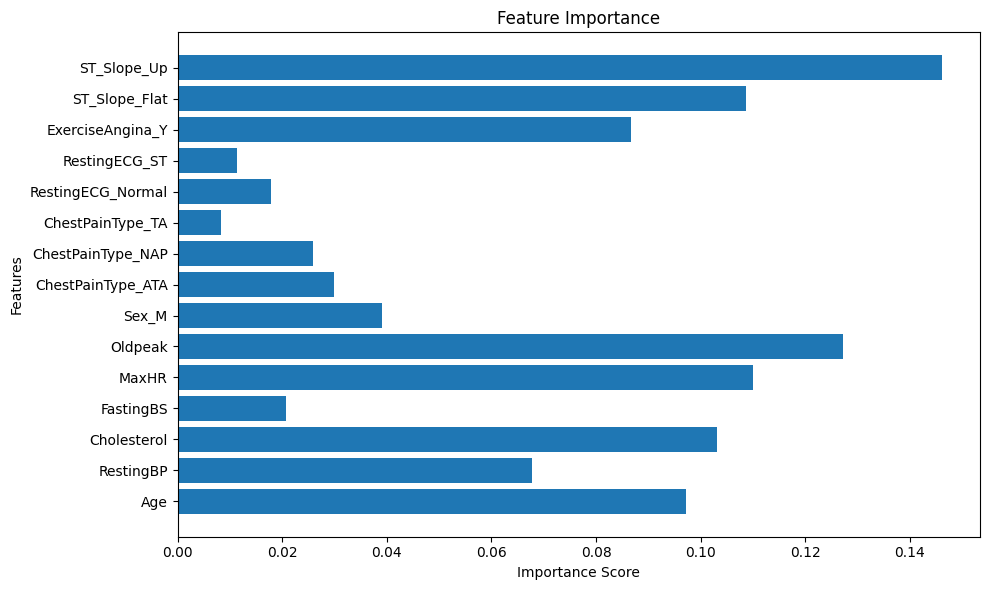

In [13]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot
plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [16]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(
    n_estimators=200,     # more trees
    learning_rate=0.05,   # smaller learning rate
    max_depth=3,          # controls complexity
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.84      0.85        77
           1       0.89      0.90      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

